### Cyberbullying in Victoria

In [1]:
library(tidyverse)
library(readxl)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In R, we used the readxl package to read the file. In each file, we opened the first sheet, saved the first file as "kids" and the second file as "trust".

In [2]:
kids <- read_excel("../data/VCAMS_indicator_3_3.xlsx", sheet = 1)
trust <- read_excel("../data/VCAMS_indicator_8_1_0.xlsx", sheet = 1)
head(kids)
head(trust)

Year,Population group,Indicator calculation,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.2925105,0.02288191
2014,Victoria - Metropolitan,0.3030676,0.02763047
2014,Victoria - Regional,0.2661658,0.03946938
2014,Victoria - Female,0.3316388,0.02942931
2014,Victoria - Male,0.2525199,0.03589499
2014,Victoria - Year 5,0.2631566,0.03039635


Year,Population group,Indicator calculation,RSE
<dbl>,<chr>,<chr>,<chr>
2014,Victoria,0.70657970000000003,9.5195205862834715E-3
2014,Victoria - Metropolitan,0.70426500000000003,1.1887144753750363E-2
2014,Victoria - Regional,0.71235610000000005,1.5146216899104253E-2
2014,Victoria - Female,0.72144010000000003,1.2943694147303429E-2
2014,Victoria - Male,0.69139189999999995,1.4004358454300666E-2
2014,Victoria - Year 5,0.73966120000000002,1.0676644928786316E-2


For clarity and convenience, we rename the "Indicator calculation" column to "cyberbullying%" in the kids table, and to "trust%" in the trust table.

In [3]:
kids <- kids %>%
  rename('cyberbullying%' = 'Indicator calculation')
head(kids)
trust <- trust %>%
  rename('trust%' = 'Indicator calculation')
head(trust)

Year,Population group,cyberbullying%,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.2925105,0.02288191
2014,Victoria - Metropolitan,0.3030676,0.02763047
2014,Victoria - Regional,0.2661658,0.03946938
2014,Victoria - Female,0.3316388,0.02942931
2014,Victoria - Male,0.2525199,0.03589499
2014,Victoria - Year 5,0.2631566,0.03039635


Year,Population group,trust%,RSE
<dbl>,<chr>,<chr>,<chr>
2014,Victoria,0.70657970000000003,9.5195205862834715E-3
2014,Victoria - Metropolitan,0.70426500000000003,1.1887144753750363E-2
2014,Victoria - Regional,0.71235610000000005,1.5146216899104253E-2
2014,Victoria - Female,0.72144010000000003,1.2943694147303429E-2
2014,Victoria - Male,0.69139189999999995,1.4004358454300666E-2
2014,Victoria - Year 5,0.73966120000000002,1.0676644928786316E-2


All percentage and RSE columns were initially stored as text, so we converted them to numeric format. We also rounded the "trust%", "cyberbullying%", and "RSE" columns to two decimal places in both the trust and kids tables.

In [4]:
trust$`trust%` <- round(as.numeric(trust$`trust%`), 2)
trust$`RSE` <- round(as.numeric(trust$`RSE`), 2)
head(trust)
kids$`cyberbullying%` <- round(kids$`cyberbullying%`, 2)
kids$`RSE` <- round(kids$`RSE`, 2)
head(kids)


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


Year,Population group,trust%,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.71,0.01
2014,Victoria - Metropolitan,0.70,0.01
2014,Victoria - Regional,0.71,0.02
2014,Victoria - Female,0.72,0.01
2014,Victoria - Male,0.69,0.01
2014,Victoria - Year 5,0.74,0.01


Year,Population group,cyberbullying%,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.29,0.02
2014,Victoria - Metropolitan,0.30,0.03
2014,Victoria - Regional,0.27,0.04
2014,Victoria - Female,0.33,0.03
2014,Victoria - Male,0.25,0.04
2014,Victoria - Year 5,0.26,0.03


To ensure data reliability, we filtered out all rows where the Relative Standard Error (RSE) was missing or greater than or equal to 0.25 in both the kids and trust tables. This threshold was applied to retain only data with acceptable precision, as values with high RSE may be statistically unreliable.

In [5]:
kids <- kids %>%
  filter(RSE < 0.25, !is.na(RSE))
head(kids,10)
trust <- trust %>%
  filter(RSE < 0.25, !is.na(RSE))
head(trust,10)

Year,Population group,cyberbullying%,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.29,0.02
2014,Victoria - Metropolitan,0.30,0.03
2014,Victoria - Regional,0.27,0.04
2014,Victoria - Female,0.33,0.03
2014,Victoria - Male,0.25,0.04
2014,Victoria - Year 5,0.26,0.03
2014,Victoria - Year 8,0.33,0.04
2014,Victoria - Year 11,0.36,0.05
2014,Victoria - LBOTE,0.37,0.06


Year,Population group,trust%,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.71,0.01
2014,Victoria - Metropolitan,0.70,0.01
2014,Victoria - Regional,0.71,0.02
2014,Victoria - Female,0.72,0.01
2014,Victoria - Male,0.69,0.01
2014,Victoria - Year 5,0.74,0.01
2014,Victoria - Year 8,0.66,0.02
2014,Victoria - Year 11,0.64,0.03
2014,Victoria - LBOTE,0.64,0.03


We removed the prefix "Victoria - " and trimmed any leading or trailing whitespace from the "Population group" column in both the kids and trust tables. This cleaning step was necessary to standardize the names of population groups, as slight differences in formatting could prevent accurate merging of the two datasets.

In [6]:
kids <- kids %>%
  mutate(`Population group` = str_remove(`Population group`, "Victoria - "))

trust <- trust %>%
  mutate(`Population group` = str_remove(`Population group`, "Victoria - "))
head(kids)
head(trust)

Year,Population group,cyberbullying%,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.29,0.02
2014,Metropolitan,0.30,0.03
2014,Regional,0.27,0.04
2014,Female,0.33,0.03
2014,Male,0.25,0.04
2014,Year 5,0.26,0.03


Year,Population group,trust%,RSE
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.71,0.01
2014,Metropolitan,0.70,0.01
2014,Regional,0.71,0.02
2014,Female,0.72,0.01
2014,Male,0.69,0.01
2014,Year 5,0.74,0.01


The next step was to merge the kids and trust data frames into a single dataset using a full join based on the "Year" and "Population group" columns. This approach ensured that all relevant records from both tables were retained. After the join, we removed the redundant "RSE" columns.

In [7]:
library(stringr)
kids <- kids %>%
  mutate(`Population group` = str_trim(`Population group`))

trust <- trust %>%
  mutate(`Population group` = str_trim(`Population group`))
cyber <- full_join(kids, trust, by = c('Year', 'Population group'))%>%
  select(-RSE.x,-RSE.y)
head(cyber,10)

Year,Population group,cyberbullying%,trust%
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.29,0.71
2014,Metropolitan,0.30,0.70
2014,Regional,0.27,0.71
2014,Female,0.33,0.72
2014,Male,0.25,0.69
2014,Year 5,0.26,0.74
2014,Year 8,0.33,0.66
2014,Year 11,0.36,0.64
2014,LBOTE,0.37,0.64


To ensure a complete and clean dataset, we removed all rows containing missing values. This step retained only the observations where both "cyberbullying%" and "trust%" data were available.

In [8]:
cyber <- cyber%>%
  filter(rowSums(is.na(cyber)) ==0)
head(cyber,10)

Year,Population group,cyberbullying%,trust%
<dbl>,<chr>,<dbl>,<dbl>
2014,Victoria,0.29,0.71
2014,Metropolitan,0.30,0.70
2014,Regional,0.27,0.71
2014,Female,0.33,0.72
2014,Male,0.25,0.69
2014,Year 5,0.26,0.74
2014,Year 8,0.33,0.66
2014,Year 11,0.36,0.64
2014,LBOTE,0.37,0.64


We filtered out specific population groups from the dataset, such as "Victoria", "Metropolitan", "Female", "Male", and other categories, to create a refined dataset for further analysis. This step ensures that only the relevant data remains for the intended analysis.

In [9]:
cyber_cor <- cyber%>%
  filter(!`Population group` %in% c("Victoria", "Metropolitan", "Regional", "Female", "Male", "Year 5", "Year 8", "Year 11", "LBOTE", "Not LBOTE", "LBOTE unknown", "Couple family", "One parent family", "Other family", "Family type unknown"))
head(cyber_cor,10)

Year,Population group,cyberbullying%,trust%
<dbl>,<chr>,<dbl>,<dbl>
2014,Barwon,0.20,0.75
2014,Bayside Peninsula,0.33,0.72
2014,Brimbank Melton,0.35,0.69
2014,Central Highlands,0.32,0.75
2014,Goulburn,0.33,0.63
2014,Hume Moreland,0.32,0.69
2014,Inner Eastern Melbourne,0.27,0.74
2014,Inner Gippsland,0.38,0.65
2014,Mallee,0.25,0.64


Find correlation.

In [10]:
correlation <- cor(cyber_cor$`cyberbullying%`, cyber_cor$`trust%`, use = "complete.obs")


correlation

[1] -0.3660977

Create plot

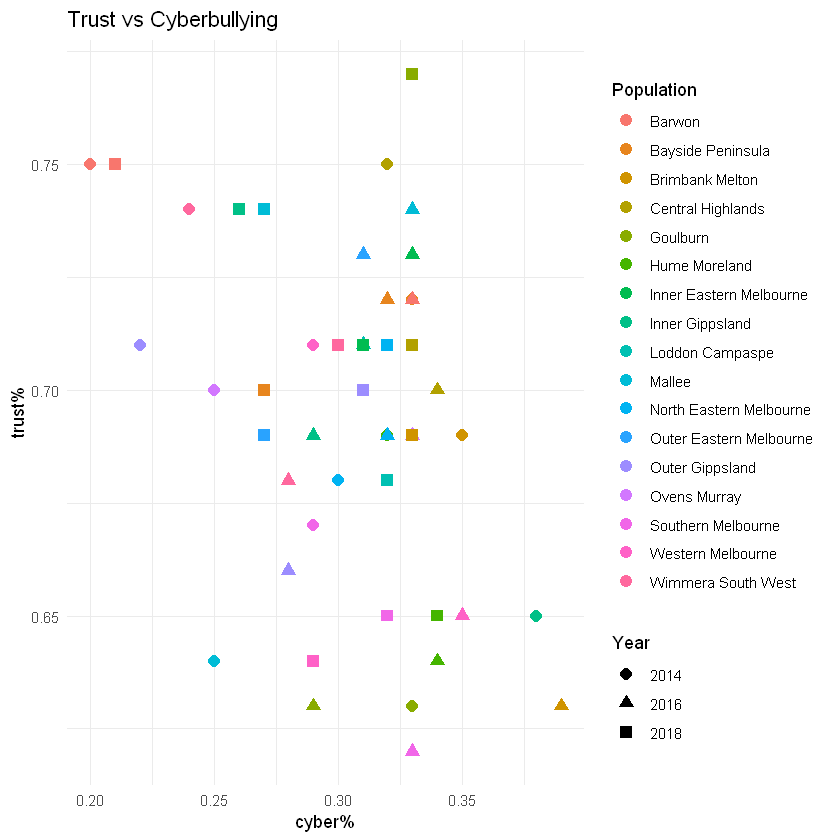

In [11]:
library(ggplot2)


ggplot(cyber_cor, aes(x = `cyberbullying%`, y = `trust%`, color = `Population group`, shape = factor(Year))) +
  geom_point(size = 3) +  
  
  labs(title = "Trust vs Cyberbullying",
       x = "cyber%",
       y = "trust%",
       color = "Population",
       shape = "Year") +
  theme_minimal() + 
  theme(legend.position = "right")  

In [12]:
cyber_cor2 <- cyber_cor %>%
  #filter(!(Year %in% c(2018, 2014) & `Population group` == 'Goulburn'))%>%
  #filter(!(Year %in% c(2016, 2014) & `Population group` == 'Mallee'))
  filter(`Population group` != 'Goulburn')%>%
  filter(`Population group` != 'Mallee')%>%
  filter(`Population group` != 'Central Highlands')

head(cyber_cor2)

correlation2 <- cor(cyber_cor2$`cyberbullying%`, cyber_cor2$`trust%`, use = "complete.obs")


correlation2


Year,Population group,cyberbullying%,trust%
<dbl>,<chr>,<dbl>,<dbl>
2014,Barwon,0.20,0.75
2014,Bayside Peninsula,0.33,0.72
2014,Brimbank Melton,0.35,0.69
2014,Hume Moreland,0.32,0.69
2014,Inner Eastern Melbourne,0.27,0.74
2014,Inner Gippsland,0.38,0.65


[1] -0.5801761

This negative correlation indicates that as trust in adults decreases, the rate of cyberbullying increases among teens, suggesting an inverse relationship between the two factors.

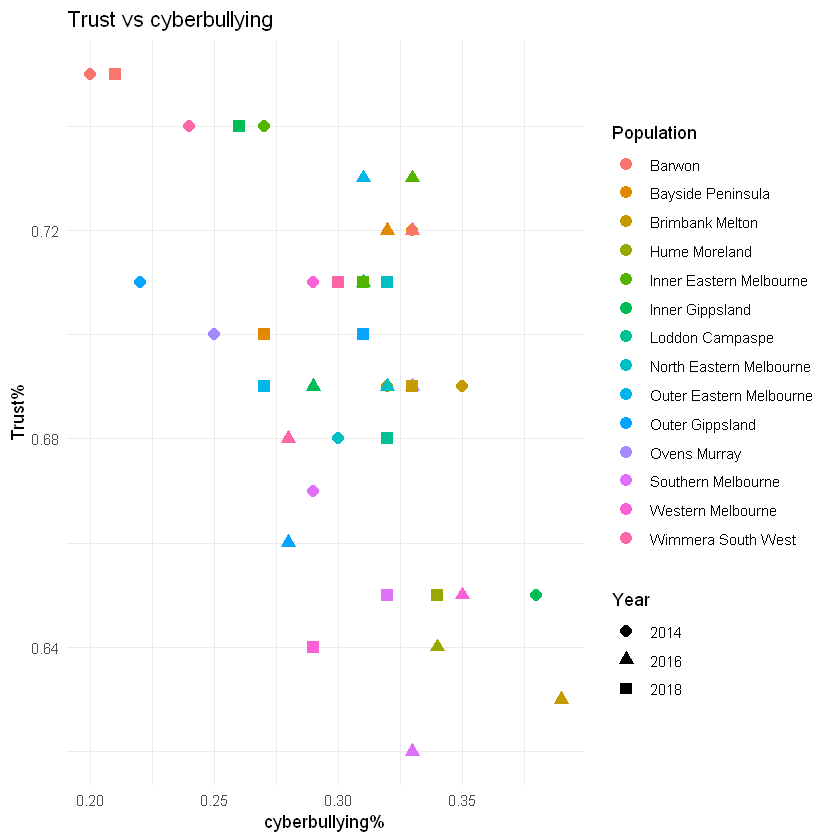

In [13]:


ggplot(cyber_cor2, aes(x = `cyberbullying%`, y = `trust%`, color = `Population group`, shape = factor(Year))) +
  geom_point(size = 3) +  
    labs(title = "Trust vs cyberbullying",
       x = "cyberbullying%",
       y = "Trust%",
       color = "Population",
       shape = "Year") +
  theme_minimal() + 
  theme(legend.position = "right")  

A new column containing row numbers was added to uniquely identify each observation, which can be used as an ID in future database operations.

In [14]:
cyber <- cyber %>%
  mutate(id = row_number())
head(cyber)

Year,Population group,cyberbullying%,trust%,id
<dbl>,<chr>,<dbl>,<dbl>,<int>
2014,Victoria,0.29,0.71,1
2014,Metropolitan,0.30,0.70,2
2014,Regional,0.27,0.71,3
2014,Female,0.33,0.72,4
2014,Male,0.25,0.69,5
2014,Year 5,0.26,0.74,6


The final cleaned and merged dataset was then exported to a CSV file for further use or analysis.

In [15]:
write.csv(cyber, "cyberbullying_stat.csv", row.names = FALSE)


### Household use of Information technology in Australia.
In R, we used the readxl package to load the dataset. We specified the path to the file containing information about internet usage and cyberbullying, and read the data from the 10th sheet, which contains information about parents' awareness of cyberbullying among their children. After loading the data, we performed the following preprocessing steps:
Selected relevant columns (1st and columns 15 to 17).
Removed the first five rows, which contained textual information and empty rows.
Assigned column names based on the first remaining row.
Removed the first two rows after column naming to clean up the dataset.

In [16]:
parents <- read_excel("../data/internet_usage_cyberbullying.xls", col_names = FALSE,  sheet =10)
parents <- parents%>%
  select(1,15:17)
parents

New names:
* `` -> `...1`
* `` -> `...2`
* `` -> `...3`
* `` -> `...4`
* `` -> `...5`
* `` -> `...6`
* `` -> `...7`
* `` -> `...8`
* `` -> `...9`
* `` -> `...10`
* `` -> `...11`
* `` -> `...12`
* `` -> `...13`
* `` -> `...14`
* `` -> `...15`
* `` -> `...16`
* `` -> `...17`
* `` -> `...18`


...1,...15,...16,...17
<chr>,<chr>,<chr>,<chr>
Australian Bureau of Statistics,NA,NA,NA
"81460DO001_201617 Household Use of Information Technology, Australia, 2016-17",NA,NA,NA
Released at 11.30am (Canberra time) 28 March 2018,NA,NA,NA
"Table 5 Households with a child aged 5-14 in the household, by child protection online indicators–2016–17",NA,NA,NA
NA,NA,NA,NA
NA,Yes,No,Don't know
NA,%,%,%
Greater Capital City Statistical Areas,NA,NA,NA
Greater capital city,4.7000000000000002,90.599999999999994,4.7000000000000002


In [17]:

parents <- parents %>%
  slice(-1:-5)  
head(parents,10)

...1,...15,...16,...17
<chr>,<chr>,<chr>,<chr>
NA,Yes,No,Don't know
NA,%,%,%
Greater Capital City Statistical Areas,NA,NA,NA
Greater capital city,4.7000000000000002,90.599999999999994,4.7000000000000002
Rest of state,6.2999999999999998,89.700000000000003,4.0999999999999996
State or territory,NA,NA,NA
New South Wales,3.7000000000000002,91.400000000000006,4.2999999999999998
Victoria,6.4000000000000004,86.599999999999994,7.2000000000000002
Queensland,4.9000000000000004,93,2.7000000000000002


In [18]:
parents[1, 1] <- "category"
colnames(parents) <- as.character(parents[1, ]) 
head(parents)

category,Yes,No,Don't know
<chr>,<chr>,<chr>,<chr>
category,Yes,No,Don't know
NA,%,%,%
Greater Capital City Statistical Areas,NA,NA,NA
Greater capital city,4.7000000000000002,90.599999999999994,4.7000000000000002
Rest of state,6.2999999999999998,89.700000000000003,4.0999999999999996
State or territory,NA,NA,NA


In [19]:

parents <- parents %>%
  slice(-1:-2)  
head(parents)

category,Yes,No,Don't know
<chr>,<chr>,<chr>,<chr>
Greater Capital City Statistical Areas,NA,NA,NA
Greater capital city,4.7000000000000002,90.599999999999994,4.7000000000000002
Rest of state,6.2999999999999998,89.700000000000003,4.0999999999999996
State or territory,NA,NA,NA
New South Wales,3.7000000000000002,91.400000000000006,4.2999999999999998
Victoria,6.4000000000000004,86.599999999999994,7.2000000000000002


To ensure a complete and clean dataset, we removed all rows containing missing values.

In [20]:
parents <- parents%>%
  filter(rowSums(is.na(parents)) ==0)
head(parents)

category,Yes,No,Don't know
<chr>,<chr>,<chr>,<chr>
Greater capital city,4.7000000000000002,90.599999999999994,4.7000000000000002
Rest of state,6.2999999999999998,89.700000000000003,4.0999999999999996
New South Wales,3.7000000000000002,91.400000000000006,4.2999999999999998
Victoria,6.4000000000000004,86.599999999999994,7.2000000000000002
Queensland,4.9000000000000004,93,2.7000000000000002
South Australia,6,87,9.0999999999999996


To ensure consistency and facilitate analysis, we converted the values in the "Yes", "No", and "Don't know" columns to numeric format. Additionally, we rounded the values in these columns to one decimal place.

In [21]:
parents$Yes<- round(as.numeric(parents$Yes), 1)
parents$No <- round(as.numeric(parents$No), 1)
parents$`Don't know`<- round(as.numeric(parents$`Don't know`), 1)
head(parents,10)


category,Yes,No,Don't know
<chr>,<dbl>,<dbl>,<dbl>
Greater capital city,4.7,90.6,4.7
Rest of state,6.3,89.7,4.1
New South Wales,3.7,91.4,4.3
Victoria,6.4,86.6,7.2
Queensland,4.9,93.0,2.7
South Australia,6.0,87.0,9.1
Western Australia,6.2,91.5,1.7
Tasmania,5.0,91.0,2.3
Northern Territory,6.1,91.2,6.4


To focus on the relevant data, we extracted rows 3 to 10 from the parents dataset, which correspond to the information about Australian states. This step ensures that the dataset contains only the state-level data.

In [22]:
parent_states <- parents[3:10,]
parent_states

category,Yes,No,Don't know
<chr>,<dbl>,<dbl>,<dbl>
New South Wales,3.7,91.4,4.3
Victoria,6.4,86.6,7.2
Queensland,4.9,93.0,2.7
South Australia,6.0,87.0,9.1
Western Australia,6.2,91.5,1.7
Tasmania,5.0,91.0,2.3
Northern Territory,6.1,91.2,6.4
Australian Capital Territory,5.8,91.4,2.8


We renamed the "category" column to "state" and the "Yes" column to "percent" for clarity. Then, we selected only the "state" and "percent" columns and added a new column, "id", containing row numbers to uniquely identify each entry in the dataset.

In [23]:
parent_states <- parent_states %>%
  rename(state = `category`, percent = Yes) %>%
  select(state, percent) %>%
  mutate(id = row_number())
parent_states

state,percent,id
<chr>,<dbl>,<int>
New South Wales,3.7,1
Victoria,6.4,2
Queensland,4.9,3
South Australia,6.0,4
Western Australia,6.2,5
Tasmania,5.0,6
Northern Territory,6.1,7
Australian Capital Territory,5.8,8


We also visualized these findings through a graph, and based on statistical data, we estimated that on average, 30-35% of teens in Australia are affected by cyberbullying, with slightly higher percentages among girls compared to boys. Since our cyberbullying data is based on statistics from the state of Victoria, we also analyzed data on parents' awareness of their children's cyberbullying experiences in the same state during the same period. The results revealed that parents are aware of only 20% of cyberbullying cases, indicating that children are not reporting these issues and are left to handle them on their own.

This highlights an important insight from our analysis: children need to be educated about the importance of reporting cyberbullying to adults, as this is essential for addressing the problem more effectively and quickly. By making adults aware of these issues, solutions can be found sooner.

These findings will be showcased through an interactive visualization on our website, allowing users to see the situation within the context of their own class. 

Finally, we saved the resulting dataframe as a CSV file.

In [24]:
write.csv(parent_states, "parent_states.csv", row.names = FALSE)
